In [1]:
from sklearn import datasets

digit_dataset = datasets.load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
type(digit_dataset)

sklearn.utils._bunch.Bunch

In [3]:
digit_dataset["images"].shape

(1797, 8, 8)

In [4]:
type(digit_dataset["images"])

numpy.ndarray

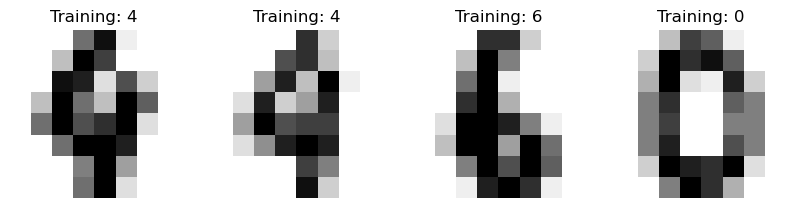

In [5]:
import matplotlib.pyplot as plt
from random import randint

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax in axes:
    num = randint(1, 1000)
    image = digit_dataset["images"][num]
    label = digit_dataset["target"][num]
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = digit_dataset["data"]
y = digit_dataset["target"]
# y data mapping 123 to one two three
y = pd.Series(y).map(
    {
        0: "zero",
        1: "one",
        2: "two",
        3: "three",
        4: "four",
        5: "five",
        6: "six",
        7: "seven",
        8: "eight",
        9: "nine",
    }
)
le = LabelEncoder()
y = le.fit_transform(y)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

[9 4 8 ... 0 3 0]


In [7]:
print(X.shape, X_train.shape, X_test.shape)

(1797, 64) (1347, 64) (450, 64)


In [8]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag")

# model fit
logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

/home/aa/miniconda3/envs/my_project/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aa/miniconda3/envs/my_project/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

nine
[ 0.  0.  8. 15.  9.  0.  0.  0.  0.  1. 16. 10. 16.  9.  0.  0.  0.  2.
  6.  2. 16. 16.  1.  0.  0.  3.  9.  9. 16. 14.  0.  0.  0.  0.  7.  5.
 12.  5.  0.  0.  0.  0.  0.  0.  7. 12.  1.  0.  0.  0.  0.  0.  2. 16.
  4.  0.  0.  0.  9. 13. 12. 10.  1.  0.]
six
[ 0.  0.  0. 10. 11.  0.  0.  0.  0.  0.  9. 16.  6.  0.  0.  0.  0.  0.
 15. 13.  0.  0.  0.  0.  0.  0. 14. 10.  0.  0.  0.  0.  0.  1. 15. 12.
  8.  2.  0.  0.  0.  0. 12. 16. 16. 16. 10.  1.  0.  0.  7. 16. 12. 12.
 16.  4.  0.  0.  0.  9. 15. 12.  5.  0.]
five
[ 0.  1. 13. 16. 16. 11.  1.  0.  0.  8. 16. 16. 13. 11.  1.  0.  0. 11.
 13.  1.  0.  0.  0.  0.  0. 10. 13.  2.  0.  0.  0.  0.  0.  2. 14. 15.
  6.  0.  0.  0.  0.  0.  0.  8. 16.  6.  0.  0.  0.  0.  6.  9. 15.  9.
  0.  0.  0.  0. 13. 16. 15.  3.  0.  0.]
eight
[ 0.  2. 12. 14.  3.  0.  0.  0.  0.  7. 16.  1.  0.  4.  1.  0.  0.  0.
 13. 16. 16. 15.  1.  0.  0.  0.  7. 16. 14.  1.  0.  0.  0.  0. 15. 14.
 16.  0.  0.  0.  0.  2. 16.  1. 15.  7.  0.  0.  0

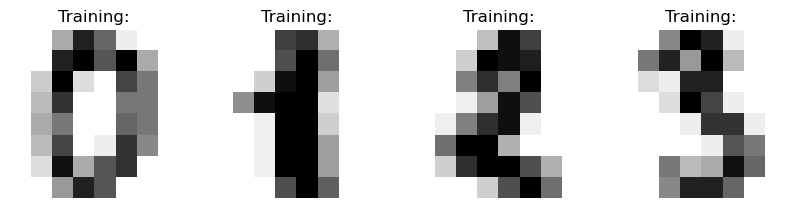

In [44]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
)

y_pred_ovr = logreg_ovr.predict(X_test)
y_pred_softmax = logreg_softmax.predict(X_test)
# print("ovr model:")
# print(confusion_matrix(y_test, y_pred_ovr))
# print("softmax model:")
# print(confusion_matrix(y_test, y_pred_softmax))
# convert to one two threee to 1 2 3
# y_test = le.inverse_transform(y_test)
# y_pred_ovr = le.inverse_transform(y_pred_ovr)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for i, ax in enumerate(axes):
    image = digit_dataset["images"][i]
    print(y_test[i])
    print(X_test[i])
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(
        "Training:",
    )

In [10]:
print("ovr model:")
print(f"classification_report \n{classification_report(y_test, y_pred_ovr)}")
print("softmax model:")
print(f"classification_report \n{classification_report(y_test, y_pred_softmax)}")

ovr model:
classification_report 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.75      1.00      0.86        36
           2       1.00      1.00      1.00        50
           3       1.00      0.91      0.95        44
           4       0.96      0.93      0.95        46
           5       0.94      1.00      0.97        46
           6       1.00      0.96      0.98        51
           7       0.98      0.94      0.96        48
           8       0.88      0.81      0.85        37
           9       0.95      0.90      0.93        42

    accuracy                           0.95       450
   macro avg       0.95      0.94      0.94       450
weighted avg       0.95      0.95      0.95       450

softmax model:
classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.84      1.00      0.91        36
      

In [11]:
print("ovr model:")
print(f"accuracy_score: {accuracy_score(y_test, y_pred_ovr)}")
print("softmax model:")
print(f"accuracy_score: {accuracy_score(y_test, y_pred_softmax)}")

result = confusion_matrix(y_test, y_pred_ovr)
result.diagonal().sum() / result.sum()

ovr model:
accuracy_score: 0.9466666666666667
softmax model:
accuracy_score: 0.9533333333333334


0.9466666666666667

In [20]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_ovr, pos_label=1)

In [22]:
roc_auc = auc(fpr, tpr)
roc_auc

0.1328502415458937

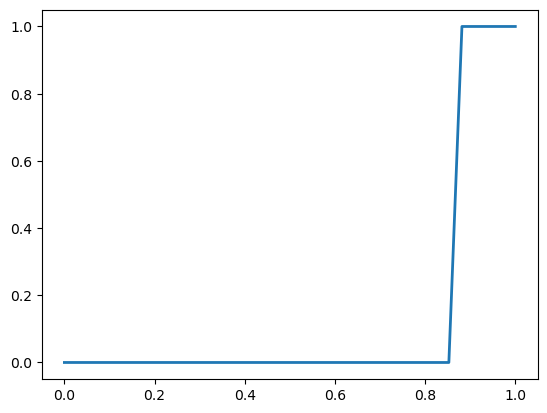

In [17]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=lw, label="ROC curve ")
plt.show()

In [28]:
# ovr model
for i in range(10):
    print(f"ovr model: probability of {i}: {logreg_ovr.predict_proba(X_test)[i]}")

ovr model: probability of 0: [5.57343730e-08 6.78736086e-03 9.70479048e-01 1.20450600e-14
 8.94081228e-07 7.31805124e-24 1.09688065e-07 1.71868542e-07
 2.27323597e-02 3.44286419e-16]
ovr model: probability of 1: [1.92864514e-13 6.18955940e-08 6.69152554e-06 4.69732620e-11
 3.50579619e-07 1.27574855e-07 1.29786225e-15 9.99992700e-01
 1.68914611e-09 6.62300526e-08]
ovr model: probability of 2: [9.99440043e-01 9.38210117e-06 3.10346187e-11 6.84496708e-16
 6.01818398e-05 2.93002184e-13 4.68160232e-04 3.15358743e-12
 1.29568441e-05 9.27601262e-06]
ovr model: probability of 3: [3.05835995e-07 8.85514053e-09 9.87847027e-12 5.92480027e-14
 7.26357850e-08 8.09721257e-08 9.94624730e-01 1.30070676e-13
 5.37480206e-03 9.18365020e-21]
ovr model: probability of 4: [2.31745748e-05 2.18870576e-11 3.57097455e-07 7.65735659e-17
 1.14758240e-06 1.13118514e-07 9.99937757e-01 7.49566854e-09
 3.74433347e-05 1.27664482e-20]
ovr model: probability of 5: [4.09768133e-16 9.99152178e-01 7.37321312e-09 9.66173457

In [29]:
# softmax model
for i in range(10):
    print(
        f"softmax model: probability of {i}: {logreg_softmax.predict_proba(X_test)[i]}"
    )

softmax model: probability of 0: [2.25945204e-09 5.47849983e-05 9.99942005e-01 4.93168738e-11
 1.24609186e-09 8.75841310e-19 7.04239940e-07 7.61494189e-08
 2.42625980e-06 2.64206800e-14]
softmax model: probability of 1: [2.61391944e-14 2.33106688e-10 5.40546020e-07 3.00740447e-07
 2.49866124e-10 5.57263044e-10 3.59417859e-16 9.99999151e-01
 1.17846436e-11 6.31786479e-09]
softmax model: probability of 2: [9.99986246e-01 2.57631817e-09 5.38836826e-12 4.54731163e-13
 1.48809224e-07 1.44550996e-10 1.10287705e-05 5.97875388e-12
 1.42877717e-06 1.14517444e-06]
softmax model: probability of 3: [2.27490930e-07 8.48006954e-09 2.04497683e-11 6.84878527e-11
 2.15167308e-07 5.67937800e-09 9.99978389e-01 9.11572110e-14
 2.11545313e-05 2.43366719e-14]
softmax model: probability of 4: [8.70013933e-06 3.69972470e-10 1.81563710e-08 1.32172166e-12
 7.79241546e-07 8.04933666e-09 9.99987173e-01 8.25762999e-12
 3.32150841e-06 8.01011446e-16]
softmax model: probability of 5: [1.67293247e-12 9.99935206e-01 1